<a href="https://colab.research.google.com/github/liviasouza01/Machine-learning/blob/main/intrusion_detection_unsw_nb15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Loading and Checking the dataset

In [96]:
df_train = pd.read_csv("/content/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("/content/UNSW_NB15_testing-set.csv")
print("Length of training set: ", len(df_train))
print("Length of testing set: ", len(df_test))

Length of training set:  82332
Length of testing set:  175341


In [97]:
df = pd.concat([df_train, df_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [98]:
print(df.duplicated().sum())

0


## Checking for missing values

In [31]:
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [100]:
df['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

In [101]:
df = df.drop(columns=['id', 'attack_cat'])

In [104]:
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index([], dtype='object')


In [105]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


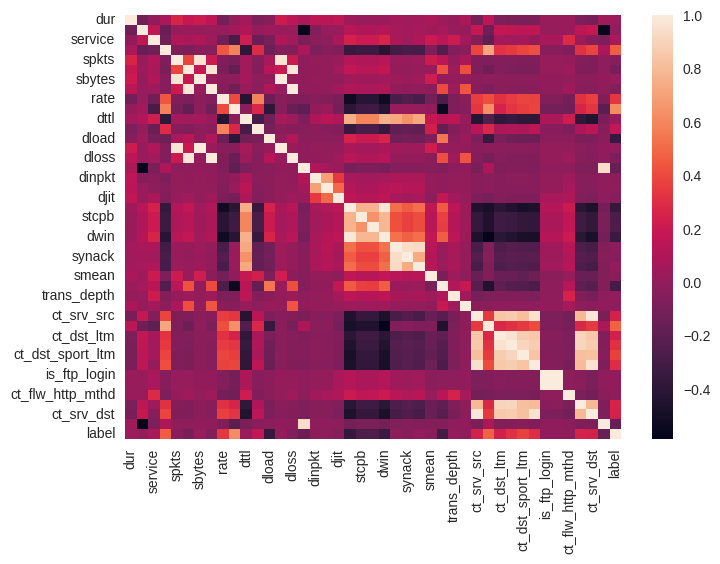

In [106]:
sns.heatmap(df.corr())
plt.show()

In [107]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss 0.995771577240686
dbytes dloss 0.9967111338314709
swin dwin 0.9804584289136614
is_ftp_login ct_ftp_cmd 0.9988554882935945


In [108]:
df = df.drop(columns=correlated_vars)

## Splitting training and testing sets

In [109]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [110]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


## Scaling


In [111]:
# Scale the variables to have 0 mean and unit variance
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Split the data into training and DSEL for DS techniques
X_train, X_dsel, y_train, y_dsel = train_test_split(X_train, y_train, test_size=0.5)

# **OLP** Model training

In [112]:
import numpy as np
import copy

from scipy.stats import mode
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import check_classification_targets
import deslib

In [113]:
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import BaggingClassifier

# Train a pool of 10 classifiers
pool_classifiers = RandomForestClassifier(n_estimators=7)
pool_classifiers.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=7, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [114]:
import OLP as Olp
olp = Olp.OLP(pool_classifiers)

In [93]:
olp.fit(X_dsel, np.array(y_dsel))

In [115]:
print('Classification accuracy OLP: ', olp.score(X_test, np.array(y_test)))

ValueError: ignored

In [90]:
predict = olp.predict(X_test)

AttributeError: ignored